<a href="https://colab.research.google.com/github/et1214ted/YOLOv4-Cloud-Tutorial/blob/master/Metal_Surface_Defects_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NEU Metal Surface Defects Data.zip to NEU Metal Surface Defects Data.zip


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['NEU Metal Surface Defects Data.zip']),'r')
data.extractall()

In [ ]:
data.printdir()

In [ ]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir = 'NEU Metal Surface Defects Data/test'

print("Train Directory: ", os.listdir(train_dir))
print("Validation Directory: ", os.listdir(val_dir))
print("Test Directory: ", os.listdir(test_dir))
print("\n")
print("Training Patches Data: ", len(os.listdir(train_dir+'/'+'Patches')))
print("Validation Patches Data: ", len(os.listdir(val_dir+'/'+'Patches')))
print("Test Patches Data: ", len(os.listdir(test_dir+'/'+'Patches')))
print("\n")
print("Training Crazing Data: ", len(os.listdir(train_dir+'/'+'Crazing')))
print("Validation Crazing Data: ", len(os.listdir(val_dir+'/'+'Crazing')))
print("Test Crazing Data: ", len(os.listdir(test_dir+'/'+'Crazing')))
print("\n")
print("Training Scratches Data: ", len(os.listdir(train_dir+'/'+'Scratches')))
print("Validation Scratches Data: ", len(os.listdir(val_dir+'/'+'Scratches')))
print("Test Scratches Data: ", len(os.listdir(test_dir+'/'+'Scratches')))
print("\n")
print("Training Rolled Data: ", len(os.listdir(train_dir+'/'+'Rolled')))
print("Validation Rolled Data: ", len(os.listdir(val_dir+'/'+'Rolled')))
print("Test Rolled Data: ", len(os.listdir(test_dir+'/'+'Rolled')))
print("\n")
print("Training Inclusion Data: ", len(os.listdir(train_dir+'/'+'Inclusion')))
print("Validation Inclusion Data: ", len(os.listdir(val_dir+'/'+'Inclusion')))
print("Test Inclusion Data: ", len(os.listdir(test_dir+'/'+'Inclusion')))
print("\n")
print("Training Inclusion Data: ", len(os.listdir(train_dir+'/'+'Pitted')))
print("Validation Inclusion Data: ", len(os.listdir(val_dir+'/'+'Pitted')))
print("Test Inclusion Data: ", len(os.listdir(test_dir+'/'+'Pitted')))

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (200, 200),
    batch_size = 10,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (200,200),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print("\n Reached 99% accuracy. Training stopped.")
      self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (2,2), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPooling2D (2,2),
                                    tf.keras.layers.Conv2D(64, (2,2), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D (2,2),
                                    tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D (2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

print('Compile Successfully')

Compile Successfully


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [callbacks],
                    verbose = 1, shuffle = True)

Epoch 1/20
166/166 [==============================] - 114s 677ms/step - loss: 2.3891 - accuracy: 0.2556 - val_loss: 0.7748 - val_accuracy: 0.7222
Epoch 2/20
166/166 [==============================] - 114s 687ms/step - loss: 1.0252 - accuracy: 0.6516 - val_loss: 1.5550 - val_accuracy: 0.4861
Epoch 3/20
166/166 [==============================] - 111s 668ms/step - loss: 0.7024 - accuracy: 0.7588 - val_loss: 0.5945 - val_accuracy: 0.8611
Epoch 4/20
166/166 [==============================] - 114s 685ms/step - loss: 0.6205 - accuracy: 0.8002 - val_loss: 0.4694 - val_accuracy: 0.9028
Epoch 5/20
166/166 [==============================] - 111s 670ms/step - loss: 0.4141 - accuracy: 0.8672 - val_loss: 0.4066 - val_accuracy: 0.9167
Epoch 6/20
166/166 [==============================] - 114s 684ms/step - loss: 0.4138 - accuracy: 0.8593 - val_loss: 0.3152 - val_accuracy: 0.9167
Epoch 7/20
166/166 [==============================] - 112s 676ms/step - loss: 0.3842 - accuracy: 0.8690 - val_loss: 0.1003 -

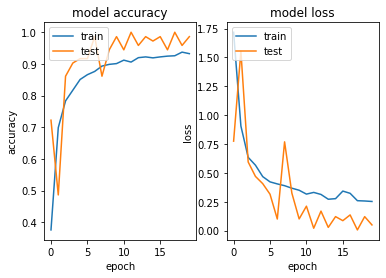

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(1)  

plt.subplot(121)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

plt.subplot(122)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [ ]:
from sklearn.datasets import load_files
import numpy as np

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)
print (x_test)

NameError: ignored

In [ ]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [ ]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [ ]:
x_test = x_test.astype('float32')/255

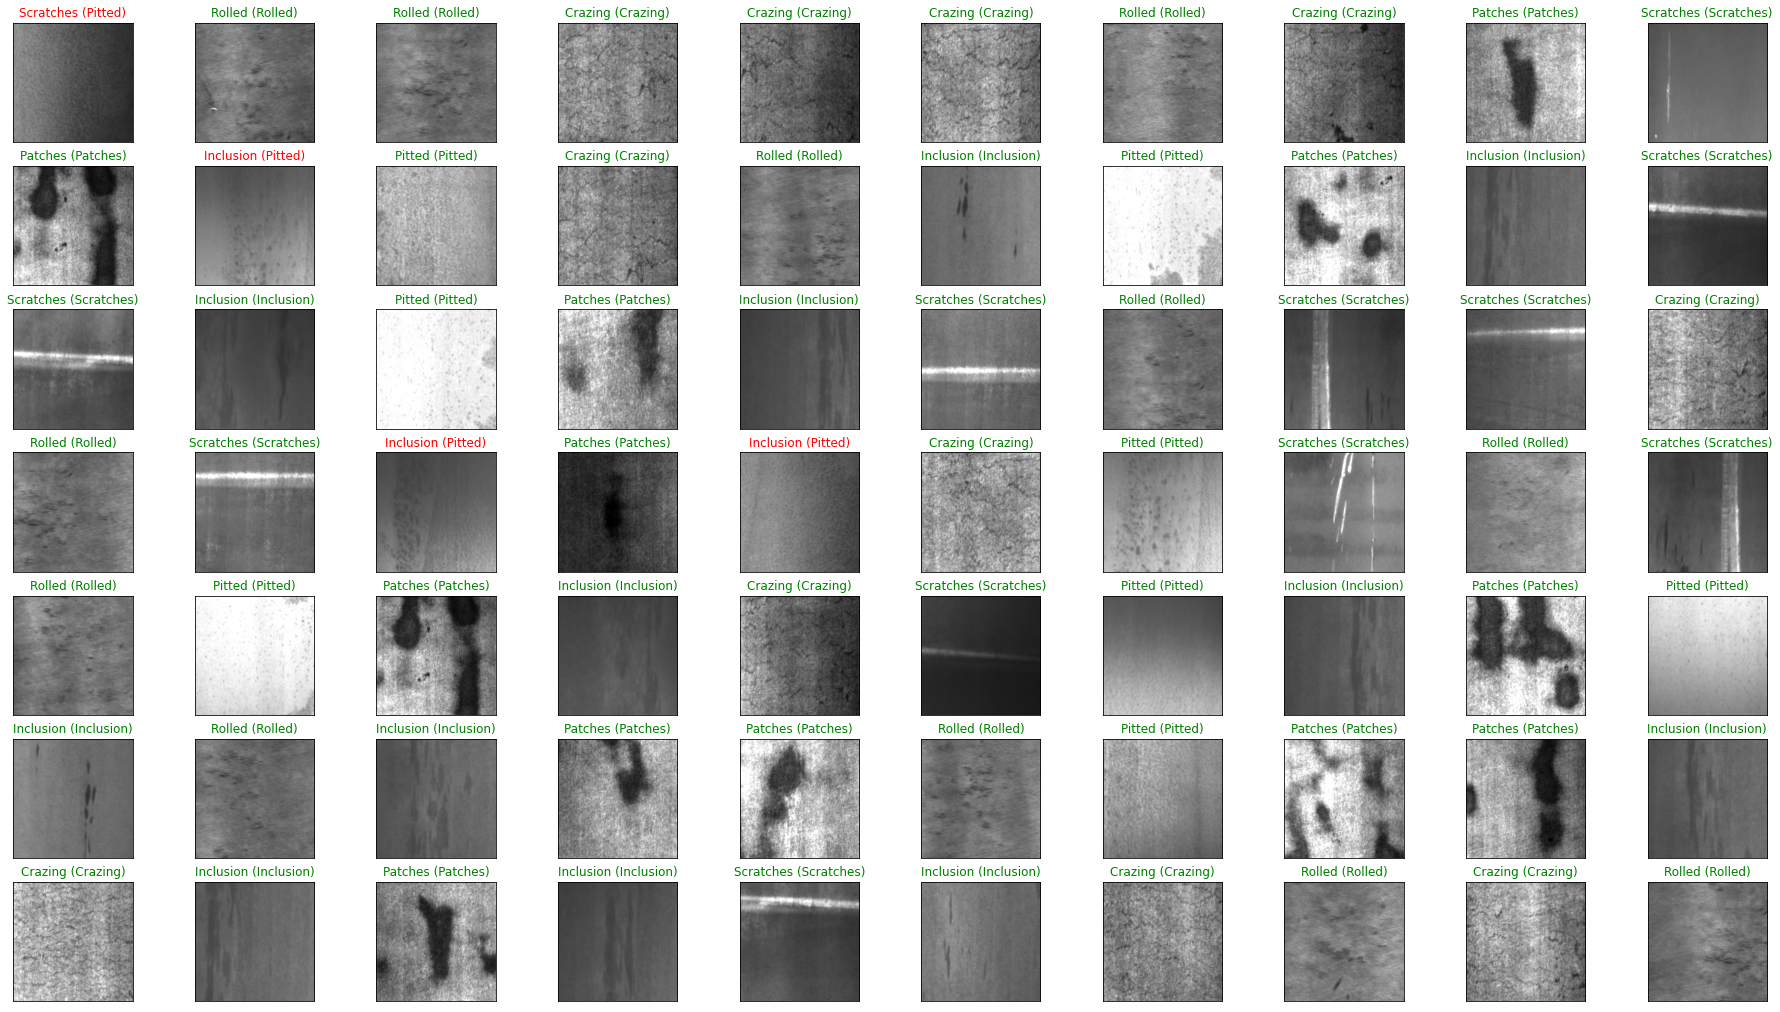

In [ ]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(32, 18))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=70, replace=False)):
    ax = fig.add_subplot(7, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))